# Data Wrangling
### Data sources
Player biography and season stats were obtained from [this kaggle dataset](https://www.kaggle.com/drgilermo/nba-players-stats).<br>
Player draft history were obtained from [this kaggle dataset](https://www.kaggle.com/amiles/nbadraftvalue).<br>
Incomplete/missing data were scraped from [basketball-reference.com](https://www.basketball-reference.com)

## 1. Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import lxml.html as lh
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

In [2]:
# Read the player season stats data
season_stats = pd.read_csv('../data/raw/Seasons_stats.csv', index_col=0)
# Remove two blank columns
season_stats.drop(['blanl', 'blank2'], axis=1, inplace=True)
season_stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
season_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Data columns (total 50 columns):
Year      24624 non-null float64
Player    24624 non-null object
Pos       24624 non-null object
Age       24616 non-null float64
Tm        24624 non-null object
G         24624 non-null float64
GS        18233 non-null float64
MP        24138 non-null float64
PER       24101 non-null float64
TS%       24538 non-null float64
3PAr      18839 non-null float64
FTr       24525 non-null float64
ORB%      20792 non-null float64
DRB%      20792 non-null float64
TRB%      21571 non-null float64
AST%      22555 non-null float64
STL%      20792 non-null float64
BLK%      20792 non-null float64
TOV%      19582 non-null float64
USG%      19640 non-null float64
OWS       24585 non-null float64
DWS       24585 non-null float64
WS        24585 non-null float64
WS/48     24101 non-null float64
OBPM      20797 non-null float64
DBPM      20797 non-null float64
BPM       20797 non-null float64
VOR

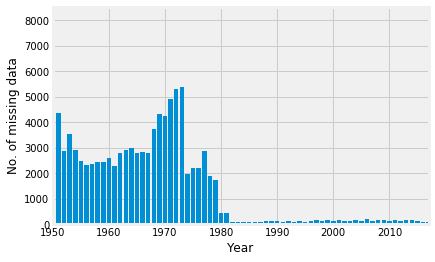

In [4]:
# There were some missing data
# Let's see which years are the missing data from
missing_data = season_stats.groupby('Year').apply(lambda x:x.isnull().sum()).sum(axis=1)
# Bar plot
_ = plt.bar(missing_data.index, missing_data)
_ = plt.xlabel('Year')
_ = plt.ylabel('No. of missing data')
_ = plt.xlim([1950, 2017])

Most missing data were from early years. That's not surprising.<br>
NBA introduced the 3-point shot in the 1980 season. NBA started tracking blocks, steals, turnovers, etc. in the 70s. Arguably, the game of basketball was also very different back then without 3-point shot and shot clock, etc.<br>
For this study, I decided to use data from the 1980 season to present.

In [5]:
# Discard seasons before 1980
season_stats = season_stats[season_stats['Year']>=1980]

## 2. Scrape missing data

In [6]:
# The seasons data ends in 2017. I need to get the data from 2018
# Write a function to scrape the data from basketball-reference.com
def season_stats_scraper(url):
    # Get the page content
    page = requests.get(url)
    doc = lh.fromstring(page.content)
    # Extract the table from page
    tr_elements = doc.xpath('//tr')
    # First row is column names, if blank replace with 'blank'
    cols = [t.text_content() if t.text_content() != u'\xa0'\
                             else 'blank' for t in tr_elements[0]]
    tr_elements.pop(0)
    # Read the rest of rows
    cols_data = [[] for i in cols]
    for row in tr_elements:
        # The table on the website repeats its column names every 20 rows or so
        # Let's check for those and skip them
        if row[0].text_content() == 'Rk':
            continue
        for col_index, col in enumerate(row.iterchildren()):
            col_text = col.text_content()
            #try to convert to numbers
            try:
                if col_text == '':
                    num = np.nan
                else:
                    num = float(col_text)
                cols_data[col_index].append(num)
            except:
                cols_data[col_index].append(col_text)
    # Make dataframe
    df = pd.DataFrame(dict(zip(cols, cols_data)), columns=cols)
    # Drop blank columns if the dataframe has one
    if 'blank' in cols:
        df = df.drop('blank', axis=1)
    return df

In [7]:
# Scrape the 2018 season advanced stats
url = 'https://www.basketball-reference.com/leagues/NBA_2018_advanced.html'
adv_data_2018 = season_stats_scraper(url)
# Scrape the 2018 season total stats
url = 'https://www.basketball-reference.com/leagues/NBA_2018_totals.html'
tot_data_2018 = season_stats_scraper(url)

In [8]:
# Drop the duplicate columns from tot_data_2018
duplicated = tot_data_2018.columns.isin(adv_data_2018.columns)
duplicated_columns = tot_data_2018.columns[duplicated]
tot_data_2018.drop(duplicated_columns, axis=1, inplace=True)
# Merge the two dataframes
data_2018 = pd.concat([adv_data_2018, tot_data_2018], axis=1)
# Drop the 'Rk' column and add a 'Year' column
data_2018.drop('Rk', axis=1, inplace=True)
data_2018.insert(0, 'Year', 2018)
data_2018.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2018,Alex Abrines,SG,24.0,OKC,75.0,1134.0,9.0,0.567,0.759,0.158,2.5,8.9,5.6,3.4,1.7,0.6,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1,8.0,115.0,291.0,0.395,84.0,221.0,0.380,31.0,70.0,0.443,0.540,39.0,46.0,0.848,26.0,88.0,114.0,28.0,38.0,8.0,25.0,124.0,353.0
1,2018,Quincy Acy,PF,27.0,BRK,70.0,1359.0,8.2,0.525,0.800,0.164,3.1,17.0,10.0,6.0,1.2,1.6,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1,8.0,130.0,365.0,0.356,102.0,292.0,0.349,28.0,73.0,0.384,0.496,49.0,60.0,0.817,40.0,217.0,257.0,57.0,33.0,29.0,60.0,149.0,411.0
2,2018,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.2,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3,76.0,448.0,712.0,0.629,0.0,2.0,0.000,448.0,710.0,0.631,0.629,160.0,286.0,0.559,384.0,301.0,685.0,88.0,92.0,78.0,128.0,215.0,1056.0
3,2018,Bam Adebayo,C,20.0,MIA,69.0,1368.0,15.7,0.570,0.021,0.526,9.7,21.6,15.6,11.0,1.2,2.5,13.6,15.9,2.3,1.9,4.2,0.148,-1.6,1.8,0.2,0.8,19.0,174.0,340.0,0.512,0.0,7.0,0.000,174.0,333.0,0.523,0.512,129.0,179.0,0.721,118.0,263.0,381.0,101.0,32.0,41.0,66.0,138.0,477.0
4,2018,Arron Afflalo,SG,32.0,ORL,53.0,682.0,5.8,0.516,0.432,0.160,0.6,10.1,5.3,6.2,0.3,1.1,10.8,12.5,-0.1,0.2,0.1,0.009,-4.1,-1.8,-5.8,-0.7,3.0,65.0,162.0,0.401,27.0,70.0,0.386,38.0,92.0,0.413,0.485,22.0,26.0,0.846,4.0,62.0,66.0,30.0,4.0,9.0,21.0,56.0,179.0


In [9]:
# Reorder the columns to the same order as season_stats
data_2018 = data_2018[season_stats.columns]
# Merge the two dataframes
season_stats = pd.concat([season_stats, data_2018])

## 3. Remove players with duplicate names

In [10]:
# As we can see in the season stats data, there were no unique IDs for players.
# So I have to use names as ID. Let's see if there were any duplicate names.
# Read the player biography data and discard players who retired before 1980
player_data = pd.read_csv('../data/raw/player_data.csv')
player_data = player_data[player_data['year_end']>=1980]
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California


In [11]:
# In season stats, hall of fame players have a * next to their name. 
# In other datasets, they don't have that. Let's fix this inconsistency.
season_stats['Player'] = season_stats['Player'].str.replace('*','')
# Drop players with duplicated names
player_data.drop_duplicates(subset=['name'], keep=False, inplace=True)
# Filter the season stats to remove those with duplicated names
season_stats = season_stats.loc[season_stats['Player'].isin(player_data['name'])]

## 4. Get draft data

In [12]:
draft = pd.read_csv('../data/raw/draft78.csv')
draft.head()

,Pick,Player,Yrs,Draft
0,1,Mychal Thompson,12.0,1978
1,2,Phil Ford,7.0,1978
2,3,Rick Robey,8.0,1978
3,4,Micheal Ray Richardson,8.0,1978
4,5,Purvis Short,12.0,1978


In [13]:
# See first and last year of draft data
print ('The first year and last year of the draft data are {} and {}, respectively'\
       .format(draft['Draft'].min(), draft['Draft'].max()))
# I don't need the Yrs and Draft columns
draft.drop(['Yrs', 'Draft'], axis=1, inplace=True)

The first year and last year of the draft data are 1978 and 2015, respectively


In [14]:
# Some recent years of the draft data are missing.
# We also need data for players who were drafted before 1978. Our season stats start in 1980. 
# For draft data of all players in NBA in 1980, I should probably go back 15 years.
# Write a similar scraper as the season stats scraper, but modified for draft data tables.
def draft_data_scraper(url):
    # Get the page content
    page = requests.get(url)
    doc = lh.fromstring(page.content)
    # Extract the table from page
    tr_elements = doc.xpath('//tr')
    # Skip the extra header in the table
    tr_elements.pop(0)
    # First row is column names
    cols = [t.text_content() for t in tr_elements[0]]
    tr_elements.pop(0)
    # Read the rest of rows
    cols_data = [[] for i in cols]
    for row in tr_elements:
        # The table on the website repeats its column names some times, and also has extra header rows.
        # Let's check for those and skip them
        if (len(row) != len(cols)) or (row[0].text_content() == 'Rk'):
            continue
        for col_index, col in enumerate(row.iterchildren()):
            col_text = col.text_content()
            #try to convert to numbers
            try:
                if col_text == '':
                    num = np.nan
                else:
                    num = float(col_text)
                cols_data[col_index].append(num)
            except:
                cols_data[col_index].append(col_text)
    # Make dataframe
    df = pd.DataFrame(dict(zip(cols, cols_data)), columns=cols)
    return df
# Scrape data from 1965-1977, and 2016-2017
seasons = list(range(1965, 1978)) + [2016, 2017]
additional_drafts = []
for season in seasons:
    url = 'https://www.basketball-reference.com/draft/NBA_{}.html'.format(season)
    df = draft_data_scraper(url)
    additional_drafts.append(df)
# Combine them into one dataframe
additional_drafts = pd.concat(additional_drafts)
additional_drafts.head()

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
0,1.0,NaN,DET,Bill Buntin,University of Michigan,1.0,42.0,17.0,7.7,6.0,0.9,0.395,NaN,0.615,17.0,7.7,6.0,0.9,0.9,0.062,NaN,NaN
1,2.0,NaN,LAL,Gail Goodrich,"University of California, Los Angeles",14.0,1031.0,32.5,18.6,3.2,4.7,0.456,NaN,0.807,32.5,18.6,3.2,4.7,76.3,0.109,-0.4,5.6
2,3.0,NaN,NYK,Bill Bradley,Princeton University,10.0,742.0,30.7,12.4,3.2,3.4,0.448,NaN,0.840,30.7,12.4,3.2,3.4,38.8,0.082,-2.3,-0.8
3,4.0,1.0,SFW,Fred Hetzel,Davidson College,6.0,416.0,21.4,11.2,5.9,1.1,0.421,NaN,0.817,21.4,11.2,5.9,1.1,15.9,0.086,NaN,NaN
4,5.0,2.0,SFW,Rick Barry,University of Miami,10.0,794.0,36.3,23.2,6.5,5.1,0.449,0.33,0.900,36.3,23.2,6.5,5.1,93.4,0.156,3.2,25.8


In [15]:
# I only need the Pk and Player columns
additional_drafts = additional_drafts[['Pk', 'Player']].dropna()
additional_drafts.columns = ['Pick','Player']
# Combine with existing draft data
draft = pd.concat([draft, additional_drafts])
# Drop players with duplicated names and players who never played in NBA
draft = draft.loc[draft['Player'].isin(player_data['name'])]
draft.drop_duplicates(subset=['Player'], keep=False, inplace=True)
# NBA draft now has 2 rounds, 60 picks, but used to have more than that.
# To make this data uniform, cap pick at 61. I plan to use 61 to mark players who were undrafted.
draft.loc[draft['Pick']>60, 'Pick'] = 61
# Merge with season_stats
season_stats = pd.merge(season_stats, draft, on='Player', how='left')
season_stats.set_index(['Year','Player'], inplace=True)

## 5. Deal with players traded mid-season
In this dataset, there were partial season stats in addition to full season stats. This happens when a player got traded/released mid-season. For example, in the cell below, this player played for 3 different teams in one year. He has 4 entries in the data, one for each team (looking at the 'Tm' column), and one for his total stats. Obviously, this will cause problems in EDA/modeling later. I want to keep use his total stats, but I also want to keep team information for potential feature engineering. I will use the team he played the most games for. 

In [16]:
# For example
season_stats.xs((2018,'Trevor Booker'), level=['Year','Player'])

Pos   Age   Tm     G   GS      MP   PER    TS%   3PAr  \
Year   Player                                                                
2018.0 Trevor Booker  PF  30.0  TOT  68.0  7.0  1158.0  14.9  0.557  0.096   
       Trevor Booker  PF  30.0  BRK  18.0  6.0   395.0  15.4  0.536  0.080   
       Trevor Booker  PF  30.0  PHI  33.0  0.0   494.0  14.5  0.618  0.064   
       Trevor Booker  PF  30.0  IND  17.0  1.0   269.0  14.7  0.512  0.167   

                        FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  \
Year   Player                                                                 
2018.0 Trevor Booker  0.271  11.1  18.6  14.9  10.8   1.2   1.5  13.3  16.6   
       Trevor Booker  0.287  10.1  22.0  16.0  16.2   1.0   0.9  15.1  21.8   
       Trevor Booker  0.358  10.7  15.7  13.3   7.6   1.6   1.9  13.7  12.6   
       Trevor Booker  0.131  13.5  18.8  16.2   9.0   0.7   1.6   9.2  16.2   

                      OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP     FG  \
Year   Player                                                              
2018.0 Trevor Booker  1.6  1.3  2.9  0.121  -1.0   0.5 -0.5   0.4  177.0   
       Trevor Booker  0.3  0.3  0.6  0.072  -1.6   0.2 -1.5   0.1   77.0   
       Trevor Booker  1.0  0.7  1.7  0.163  -0.7   1.4  0.7   0.3   61.0   
       Trevor Booker  0.4  0.3  0.7  0.118  -0.7  -0.6 -1.3   0.0   39.0   

                        FGA    FG%   3P   3PA    3P%     2P    2PA    2P%  \
Year   Player                                                               
2018.0 Trevor Booker  343.0  0.516  8.0  33.0  0.242  169.0  310.0  0.545   
       Trevor Booker  150.0  0.513  3.0  12.0  0.250   74.0  138.0  0.536   
       Trevor Booker  109.0  0.560  2.0   7.0  0.286   59.0  102.0  0.578   
       Trevor Booker   84.0  0.464  3.0  14.0  0.214   36.0   70.0  0.514   

                       eFG%    FT   FTA    FT%    ORB    DRB    TRB   AST  \
Year   Player                                                               
2018.0 Trevor Booker  0.528  66.0  93.0  0.710  117.0  201.0  318.0  82.0   
       Trevor Booker  0.523  24.0  43.0  0.558   38.0   81.0  119.0  38.0   
       Trevor Booker  0.569  32.0  39.0  0.821   47.0   75.0  122.0  27.0   
       Trevor Booker  0.482  10.0  11.0  0.909   32.0   45.0   77.0  17.0   

                       STL   BLK   TOV     PF    PTS  Pick  
Year   Player                                               
2018.0 Trevor Booker  28.0  21.0  59.0  119.0  428.0  23.0  
       Trevor Booker   8.0   5.0  30.0   43.0  181.0  23.0  
       Trevor Booker  16.0  11.0  20.0   50.0  156.0  23.0  
       Trevor Booker   4.0   5.0   9.0   26.0   91.0  23.0

In [17]:
# Extract players who were traded
traded = season_stats.loc[season_stats['Tm']=='TOT'].index
# Get the column index of Tm(team)
Tm_index = season_stats.columns.get_loc('Tm')
df_list = []
for year, player in traded:
    # extract that player and year 
    df = season_stats.xs((year, player), level=['Year','Player'])
    # separate the total and partial stats
    df1, df2 = df.loc[df['Tm']=='TOT'], df.loc[df['Tm']!='TOT']
    # sort the partial stats by game and extract the team
    df2 = df2.sort_values('G', ascending=False)
    team = df2.iloc[0, Tm_index]
    # replace 'TOT' in total stats with the team
    df1 = df1.replace('TOT', team)
    df_list.append(df1)
season_stats_traded = pd.concat(df_list)
season_stats_traded.head()

Pos   Age   Tm     G  GS      MP   PER    TS%   3PAr  \
Year   Player                                                             
1980.0 Tim Bassett  PF  28.0  NJN  12.0 NaN   164.0   6.7  0.419  0.000   
       Kent Benson   C  25.0  MIL  73.0 NaN  1891.0  13.1  0.513  0.008   
       Ron Boone    SG  33.0  UTA  81.0 NaN  2392.0  12.1  0.501  0.055   
       Tom Boswell  PF  26.0  UTA  79.0 NaN  2077.0  14.3  0.616  0.016   
       John Brown   SF  28.0  ATL  32.0 NaN   385.0   5.1  0.444  0.000   

                      FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  \
Year   Player                                                               
1980.0 Tim Bassett  0.441   7.1  14.0  10.6   9.7   2.2   0.0  18.1  11.6   
       Kent Benson  0.228   7.3  18.3  12.9  12.2   1.8   2.7  18.8  17.4   
       Ron Boone    0.214   2.7   8.1   5.5  18.8   2.0   0.1  16.4  21.5   
       Tom Boswell  0.445   8.2  15.8  12.1  11.2   0.7   1.0  19.8  18.5   
       John Brown   0.457   7.4  12.7  10.0   6.3   0.4   0.6  18.7  16.5   

                    OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP     FG    FGA  \
Year   Player                                                                   
1980.0 Tim Bassett -0.1  0.2  0.1  0.033  -3.8   0.3 -3.6  -0.1   12.0   34.0   
       Kent Benson  0.4  2.7  3.2  0.080  -1.6   2.1  0.5   1.2  299.0  618.0   
       Ron Boone    0.4  0.6  1.0  0.020  -1.3  -2.1 -3.4  -0.8  405.0  915.0   
       Tom Boswell  3.0  0.7  3.7  0.086   0.2  -1.3 -1.1   0.5  346.0  613.0   
       John Brown  -0.3  0.4  0.1  0.012  -4.7  -1.0 -5.7  -0.4   37.0  105.0   

                      FG%    3P   3PA   3P%     2P    2PA    2P%   eFG%  \
Year   Player                                                             
1980.0 Tim Bassett  0.353   0.0   0.0   NaN   12.0   34.0  0.353  0.353   
       Kent Benson  0.484   1.0   5.0  0.20  298.0  613.0  0.486  0.485   
       Ron Boone    0.443  19.0  50.0  0.38  386.0  865.0  0.446  0.453   
       Tom Boswell  0.564   5.0  10.0  0.50  341.0  603.0  0.566  0.569   
       John Brown   0.352   0.0   0.0   NaN   37.0  105.0  0.352  0.352   

                       FT    FTA    FT%    ORB    DRB    TRB    AST   STL  \
Year   Player                                                               
1980.0 Tim Bassett   10.0   15.0  0.667   11.0   22.0   33.0   14.0   8.0   
       Kent Benson   99.0  141.0  0.702  126.0  327.0  453.0  178.0  73.0   
       Ron Boone    175.0  196.0  0.893   54.0  173.0  227.0  309.0  97.0   
       Tom Boswell  206.0  273.0  0.755  146.0  296.0  442.0  161.0  29.0   
       John Brown    38.0   48.0  0.792   26.0   45.0   71.0   18.0   3.0   

                     BLK    TOV     PF     PTS  Pick  
Year   Player                                         
1980.0 Tim Bassett   0.0    9.0   27.0    34.0  61.0  
       Kent Benson  92.0  157.0  246.0   698.0   1.0  
       Ron Boone     3.0  197.0  232.0  1004.0  61.0  
       Tom Boswell  37.0  181.0  270.0   903.0  17.0  
       John Brown    4.0   29.0   70.0   112.0  10.0

In [18]:
# Extract those not traded
season_stats_not_traded = season_stats[~season_stats.index.isin(traded)]
# Combine the two
season_stats = pd.concat([season_stats_traded, season_stats_not_traded])
season_stats.sort_index(level='Year', inplace=True)

## 6. Fix discrepencies caused by short seasons

In [19]:
# In 1999 (50 games) and 2012 (66 games), NBA seasons (82 games) were shortened because of lockout.
# Therefore, any stats that were cumulative were artificially smaller in those two seasons.
cumulative_features = ['G', 'GS', 'MP', 'OWS', 'DWS', 'WS', 'VORP',
                       'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
                       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
                       'PF', 'PTS']
for col in cumulative_features:
    season_stats.loc[(1999,), col] = season_stats.loc[(1999,), col].values*82/50
    season_stats.loc[(2012,), col] = season_stats.loc[(2012,), col].values*82/66

## 7. Check outliers

In [20]:
season_stats.describe()

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pick
count,15580.000000,15580.000000,15035.000000,15580.000000,15577.000000,15543.000000,15536.000000,15536.000000,15577.000000,15577.000000,15577.000000,15577.000000,15577.000000,15577.000000,15551.000000,15577.000000,15580.000000,15580.000000,15580.000000,15577.000000,15580.000000,15580.000000,15580.000000,15580.000000,15580.000000,15580.000000,15536.000000,15580.000000,15580.000000,13011.000000,15580.000000,15580.000000,15516.000000,15536.000000,15580.000000,15580.000000,15150.000000,15580.000000,15580.000000,15580.000000,15580.000000,15580.000000,15580.000000,15580.000000,15580.000000,15580.000000,13291.000000
mean,26.732478,55.956189,27.077115,1318.230434,12.756018,0.509288,0.161166,0.319683,6.220781,13.926629,10.074809,13.090852,1.647050,1.482603,14.813060,18.889491,1.434104,1.350093,2.785143,0.072045,-1.557009,-0.432144,-1.989018,0.660748,210.286428,454.564658,0.442881,25.900505,73.859476,0.249585,184.385924,380.705183,0.462268,0.469480,106.340562,141.159773,0.723965,68.487208,164.882565,233.369773,124.952495,43.907509,27.569964,81.915462,122.220921,552.813924,22.954480
std,4.048529,25.162642,30.143216,932.887450,5.894102,0.087301,0.189190,0.214974,4.820110,6.371485,4.921010,9.397867,0.960073,1.719990,6.212178,5.349037,2.172367,1.263560,3.113722,0.095072,3.607111,2.169961,4.472205,1.439635,186.429418,388.639727,0.089415,42.328224,112.115970,0.173229,172.928132,344.200825,0.092404,0.090513,112.594452,143.522305,0.139944,69.368922,148.447531,211.255534,144.273359,39.061398,38.360854,68.383222,80.825007,494.829652,17.062677
min,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.300000,-0.820000,-2.100000,-2.519000,-73.800000,-29.300000,-86.700000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,38.000000,1.000000,451.000000,10.000000,0.479000,0.006000,0.201000,2.600000,9.100000,6.100000,6.400000,1.100000,0.400000,11.300000,15.400000,0.000000,0.300000,0.300000,0.038000,-3.200000,-1.600000,-3.900000,-0.200000,53.000000,124.181818,0.406000,0.000000,2.000000,0.111000,44.000000,99.000000,0.429000,0.439000,22.000000,32.000000,0.666000,16.151515,47.000000,67.810000,23.000000,12.000000,4.000000,25.000000,51.000000,138.000000,9.000000
50%,26.000000,65.000000,12.000000,1253.000000,12.900000,0.520000,0.067000,0.289000,5.400000,13.000000,9.300000,10.300000,1.500000,0.900000,14.000000,18.600000,0.656000,1.000000,1.800000,0.080000,-1.300000,-0.400000,-1.600000,0.100000,164.000000,365.000000,0.447000,3.000000,15.000000,0.294000,136.000000,290.000000,0.470000,0.479000,69.000000,96.000000,0.750000,45.000000,130.000000,180.000000,75.000000,35.000000,14.000000,67.000000,122.000000,428.000000,19.000000
75%,29.000000,78.000000,56.000000,2092.000000,15.800000,0.554000,0.291000,0.395000,9.100000,18.200000,13.500000,17.700000,2.100000,2.000000,17.300000,22.100000,2.300000,2.000000,4.300000,0.118000,0.400000,0.800000,0.500000,1.100000,322.000000,696.000000,0.489000,36.000000,107.000000,0.364000,280.000000,578.000000,0.505000,0.513000,154.000000,207.000000,0.812000,100.000000,237.000000,335.113636,173.000000,65.000000,35.000000,124.000000,184.000000,842.250000,35.000000
max,44.000000,85.000000,83.000000,3533.000000,129.100000,1.500000,1.000000,6.000000,100.000000,100.000000,86.400000,100.000000,24.200000,77.800000,100.000000,100.000000,15.200000,9.100000,21.200000,2.123000,47.800000,46.800000,36.200000,12.400000,1098.000000,2279.000000,1.000000,402.000000,886.000000,1.000000,1086.000000,2213.000000,1.000000,1.500000,833.000000,972.000000,1.000000,573.000000,1007.000000,1530.000000,1164.

In [21]:
# Check a few outliers
# BPM(Boxscore Plus Minus) <-20 or >20 
season_stats.loc[season_stats['BPM'].abs()>30].head(10)

Pos   Age   Tm    G   GS   MP   PER    TS%   3PAr  \
Year   Player                                                                
1981.0 Lewis Brown         C  25.0  WSB  2.0  NaN  5.0 -18.6  0.192  0.000   
1986.0 Michael Young      SF  25.0  PHI  2.0  0.0  2.0 -32.2  0.000  0.000   
       Ron Crevier         C  27.0  DET  3.0  0.0  4.0 -31.7  0.000  0.000   
1988.0 Brad Wright        PF  25.0  DEN  2.0  0.0  7.0 -24.7  0.200  0.000   
1989.0 Barry Sumpter      PF  23.0  LAC  1.0  0.0  1.0 -30.2  0.000  0.000   
       Mike Champion      SF  24.0  SEA  2.0  0.0  4.0 -43.7  0.000  0.333   
1990.0 Mark Wade          PG  24.0  DAL  1.0  0.0  3.0  21.3    NaN    NaN   
1992.0 Bob Thornton       PF  29.0  UTA  2.0  0.0  6.0   1.7  0.254  0.000   
       Carlton McKinney   SG  27.0  NYK  2.0  0.0  9.0  -9.0  0.222  0.000   
1995.0 Darrell Armstrong  PG  26.0  ORL  3.0  0.0  8.0  40.2  0.563  0.750   

                            FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  \
Year   Player                                                               
1981.0 Lewis Brown        1.667  20.9  21.2  21.0   0.0   0.0   0.0  16.1   
1986.0 Michael Young      0.000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
       Ron Crevier        0.667  25.9   0.0  13.3   0.0   0.0   0.0   0.0   
1988.0 Brad Wright        0.000   0.0  15.6   7.5   0.0   0.0   0.0  28.6   
1989.0 Barry Sumpter      0.000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
       Mike Champion      0.000   0.0   0.0   0.0   0.0   0.0   0.0  25.0   
1990.0 Mark Wade            NaN   0.0   0.0   0.0  81.6   0.0   0.0   NaN   
1992.0 Bob Thornton       0.286  39.5   0.0  18.8   0.0   0.0   0.0   0.0   
       Carlton McKinney   0.000   0.0  12.6   6.4   0.0   0.0   0.0   0.0   
1995.0 Darrell Armstrong  0.250  14.8   0.0   7.2  76.1   6.3   0.0  10.1   

                          USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  \
Year   Player                                                                  
1981.0 Lewis Brown        49.8 -0.1  0.0 -0.1 -0.667 -24.9 -13.6 -38.4   0.0   
1986.0 Michael Young      40.3  0.0  0.0  0.0 -0.818 -31.3 -11.9 -43.2   0.0   
       Ron Crevier        38.0 -0.1  0.0 -0.1 -0.795 -24.0 -13.5 -37.4   0.0   
1988.0 Brad Wright        39.0 -0.1  0.0 -0.1 -0.677 -28.0  -8.5 -36.5  -0.1   
1989.0 Barry Sumpter      39.4  0.0  0.0  0.0 -0.894 -31.1 -12.4 -43.5   0.0   
       Mike Champion      39.8 -0.1  0.0 -0.1 -0.952 -31.3  -9.6 -40.8   0.0   
1990.0 Mark Wade           0.0  0.0  0.0  0.0  0.234  -9.1 -21.5 -30.6   0.0   
1992.0 Bob Thornton       56.6  0.0  0.0  0.0 -0.288 -14.5 -19.5 -34.0   0.0   
       Carlton McKinney   43.7 -0.1  0.0 -0.1 -0.402 -21.5 -12.2 -33.7  -0.1   
1995.0 Darrell Armstrong  53.0  0.1  0.0  0.1  0.492  31.7   3.1  34.8   0.1   

                           FG  FGA    FG%   3P  3PA    3P%   2P  2PA    2P%  \
Year   Player                                                                 
1981.0 Lewis Brown        0.0  3.0  0.000  0.0  0.0    NaN  0.0  3.0  0.000   
1986.0 Michael Young      0.0  2.0  0.000  0.0  0.0    NaN  0.0  2.0  0.000   
       Ron Crevier        0.0  3.0  0.000  0.0  0.0    NaN  0.0  3.0  0.000   
1988.0 Brad Wright        1.0  5.0  0.200  0.0  0.0    NaN  1.0  5.0  0.200   
1989.0 Barry Sumpter      0.0  1.0  0.000  0.0  0.0    NaN  0.0  1.0  0.000   
       Mike Champion      0.0  3.0  0.000  0.0  1.0  0.000  0.0  2.0  0.000   
1990.0 Mark Wade          0.0  0.0    NaN  0.0  0.0    NaN  0.0  0.0    NaN   
1992.0 Bob Thornton       1.0  7.0  0.143  0.0  0.0    NaN  1.0  7.0  0.143   
       Carlton McKinney   2.0  9.0  0.222  0.0  0.0    NaN  2.0  9.0  0.222   
1995.0 Darrell Armstrong  3.0  8.0  0.375  2.0  6.0  0.333  1.0  2.0  0.500   

                           eFG%   FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  \
Year   Player                                                                  
1981.0 Lewis Brown        0.000  2.0  5.0  0.4  1.0  1.0  2.0  0.0  0.0  0.0   
1986.0 Michae

In [22]:
# TRB% (Total rebound rate) > 50%
season_stats.loc[season_stats['TRB%']>50]

Pos   Age   Tm    G   GS   MP    PER    TS%  3PAr  \
Year   Player                                                               
1986.0 Claude Gregory    PF  27.0  WSB  2.0  0.0  2.0   23.0  0.500   0.0   
1987.0 Cozell McQueen    PF  25.0  DET  3.0  0.0  7.0   58.3  1.000   0.0   
1992.0 Steve Bardo       SG  23.0  SAS  1.0  0.0  1.0   32.3    NaN   NaN   
1994.0 Chuck Nevitt       C  34.0  SAS  1.0  0.0  1.0   46.0  0.568   NaN   
1996.0 Larry Sykes       PF  22.0  BOS  1.0  0.0  2.0    0.0    NaN   NaN   
2009.0 Steven Hill       PF  23.0  OKC  1.0  0.0  2.0   88.3  1.000   0.0   
2014.0 DeAndre Liggins   SG  25.0  MIA  1.0  0.0  1.0  129.1  1.000   0.0   
       Dexter Pittman     C  25.0  ATL  2.0  0.0  3.0   13.1  0.000   0.0   
2015.0 Jerrelle Benimon  PF  23.0  UTA  2.0  0.0  3.0    4.7    NaN   NaN   
2017.0 Danuel House      SG  23.0  WAS  1.0  0.0  1.0   12.2    NaN   NaN   

                         FTr   ORB%   DRB%  TRB%  AST%  STL%  BLK%   TOV%  \
Year   Player                                                               
1986.0 Claude Gregory    0.0  100.0    0.0  54.1   0.0  24.2   0.0   50.0   
1987.0 Cozell McQueen    0.0   47.4   74.7  61.5   0.0   0.0   8.2    0.0   
1992.0 Steve Bardo       NaN  100.0    0.0  54.6   0.0   0.0   0.0    NaN   
1994.0 Chuck Nevitt      NaN  100.0    0.0  56.3   0.0   0.0   0.0   27.5   
1996.0 Larry Sykes       NaN   54.7   57.4  56.0   0.0   0.0   0.0  100.0   
2009.0 Steven Hill       0.0  100.0   58.6  86.4   0.0   0.0   0.0    0.0   
2014.0 DeAndre Liggins   0.0  100.0    0.0  62.8   0.0   0.0   0.0    0.0   
       Dexter Pittman    2.0  100.0    0.0  57.9   0.0   0.0   0.0    0.0   
2015.0 Jerrelle Benimon  NaN   38.7   76.6  57.8   0.0   0.0   0.0  100.0   
2017.0 Danuel House      NaN    0.0  100.0  56.4   0.0   0.0   0.0    NaN   

                          USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  \
Year   Player                                                                  
1986.0 Claude Gregory     83.6  0.0  0.0  0.0 -0.640 -11.5   1.4 -10.2   0.0   
1987.0 Cozell McQueen     17.3  0.1  0.0  0.1  0.627  10.6  -8.0   2.5   0.0   
1992.0 Steve Bardo         0.0  0.0  0.0  0.0  0.424  14.6  -8.6   6.1   0.0   
1994.0 Chuck Nevitt      100.0  0.0  0.0  0.0 -0.174   0.8 -29.3 -28.5   0.0   
1996.0 Larry Sykes        21.5  0.0  0.0  0.0 -0.397 -21.0  -7.4 -28.3   0.0   
2009.0 Steven Hill        22.1  0.0  0.0  0.0  0.873  26.1 -19.2   6.8   0.0   
2014.0 DeAndre Liggins    47.8  0.0  0.0  0.0  2.123  47.8 -23.1  24.8   0.0   
       Dexter Pittman     28.5  0.0  0.0  0.0 -0.180  -5.4 -17.3 -22.7   0.0   
2015.0 Jerrelle Benimon   15.3  0.0  0.0  0.0 -0.215 -20.3  -6.6 -26.9   0.0   
2017.0 Danuel House        0.0  0.0  0.0  0.0  0.163 -16.4  -4.4 -20.8   0.0   

                          FG  FGA  FG%   3P  3PA  3P%   2P  2PA  2P%  eFG%  \
Year   Player                                                                
1986.0 Claude Gregory    1.0  2.0  0.5  0.0  0.0  NaN  1.0  2.0  0.5   0.5   
1987.0 Cozell McQueen    3.0  3.0  1.0  0.0  0.0  NaN  3.0  3.0  1.0   1.0   
1992.0 Steve Bardo       0.0  0.0  NaN  0.0  0.0  NaN  0.0  0.0  NaN   NaN   
1994.0 Chuck Nevitt      0.0  0.0  NaN  0.0  0.0  NaN  0.0  0.0  NaN   NaN   
1996.0 Larry Sykes       0.0  0.0  NaN  0.0  0.0  NaN  0.0  0.0  NaN   NaN   
2009.0 Steven Hill       1.0  1.0  1.0  0.0  0.0  NaN  1.0  1.0  1.0   1.0   
2014.0 DeAndre Liggins   1.0  1.0  1.0  0.0  0.0  NaN  1.0  1.0  1.0   1.0   
       Dexter Pittman    0.0  1.0  0.0  0.0  0.0  NaN  0.0  1.0  0.0   0.0   
2015.0 Jerrelle Benimon  0.0  0.0  NaN  0.0  0.0  NaN  0.0  0.0  NaN   NaN   
2017.0 Danuel House      0.0  0.0  NaN  0.0  0.0  NaN  0.0  0.0  NaN   NaN   

                          FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Year   Player                                                               
1986.0 Claude Gregory    0.0  0.0  NaN  2.0  0.0  2.0  0.0  1.0  0.0  2.0   
1987.0 Cozell McQueen    0.0  0.0  NaN  3.0  

In [23]:
# These samples all had something in common.
# The games played or minutes played were extremely small. Smaller sample size, larger noise.
# Those often resulted in outliers that didn't make sense.
# Drop all seasons with <20 games (a quarter of the season) or <100 minutes.
season_stats = season_stats.loc[(season_stats['G']>=20) & (season_stats['MP']>=100)]
# Check again for outliers. 
season_stats.describe()

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pick
count,13378.000000,13378.000000,12899.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.00000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,11825.000000,13378.000000,13378.000000,13377.000000,13378.000000,13378.000000,13378.000000,13370.000000,13378.00000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,13378.000000,11777.000000
mean,26.804455,63.604061,31.421667,1519.822688,13.539079,0.521067,0.162027,0.312638,6.099701,14.036896,10.067155,13.495971,1.652766,1.504478,14.471603,18.898976,1.676720,1.558714,3.235774,0.085396,-0.958088,-0.185641,-1.143564,0.78011,242.949578,524.526145,0.453315,29.925418,85.188460,0.251988,213.024160,439.337685,0.472386,0.480946,122.821144,162.899462,0.732652,78.92816,190.209447,269.137607,144.282296,50.640143,31.814289,94.372886,140.493478,638.645719,21.824319
std,4.042834,17.832217,30.415457,851.109346,4.279734,0.054858,0.184950,0.145962,3.822174,5.789406,4.464818,9.096660,0.694221,1.501680,4.363011,4.802830,2.252264,1.244662,3.137545,0.058113,2.582332,1.720036,3.077922,1.52014,181.328786,375.529096,0.059649,44.383231,117.100631,0.165129,170.247355,336.851879,0.058333,0.056049,113.248078,143.576662,0.114834,69.46493,145.234257,207.021658,146.870108,38.125369,39.805961,65.870650,72.287276,482.388064,16.615638
min,18.000000,20.000000,0.000000,100.000000,-3.800000,0.159000,0.000000,0.000000,0.000000,2.400000,1.900000,0.000000,0.000000,0.000000,1.400000,3.700000,-3.300000,-0.820000,-2.100000,-0.219000,-11.900000,-6.100000,-15.100000,-2.60000,3.000000,11.000000,0.148000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077000,0.148000,0.000000,0.000000,0.000000,0.00000,5.000000,6.000000,0.000000,0.000000,0.000000,1.000000,4.000000,7.000000,1.000000
25%,24.000000,52.000000,3.000000,778.000000,10.700000,0.490000,0.008000,0.210000,2.700000,9.300000,6.200000,6.800000,1.200000,0.500000,11.400000,15.600000,0.100000,0.600000,0.800000,0.050000,-2.600000,-1.400000,-3.100000,-0.20000,94.000000,216.000000,0.416000,0.000000,3.000000,0.133000,78.000000,169.000000,0.439000,0.449000,39.000000,55.000000,0.674000,27.00000,80.000000,113.000000,41.000000,21.000000,7.000000,42.000000,82.000000,245.000000,8.000000
50%,26.000000,70.000000,20.000000,1494.500000,13.300000,0.525000,0.070000,0.292000,5.500000,13.100000,9.400000,10.700000,1.600000,1.000000,13.900000,18.600000,1.000000,1.300000,2.400000,0.086000,-1.000000,-0.300000,-1.200000,0.20000,203.000000,444.000000,0.452000,6.000000,26.000000,0.300000,169.000000,356.000000,0.474000,0.482500,89.000000,122.000000,0.750000,56.00000,156.000000,217.000000,96.000000,43.000000,18.000000,80.360000,139.000000,529.000000,18.000000
75%,30.000000,79.000000,63.000000,2220.000000,16.000000,0.555750,0.293000,0.388000,9.000000,18.300000,13.500000,18.100000,2.000000,2.000000,16.900000,22.000000,2.600000,2.200000,4.800000,0.121000,0.600000,0.900000,0.800000,1.40000,351.000000,757.510000,0.490000,46.000000,133.000000,0.364000,308.000000,632.000000,0.507000,0.515000,173.000000,229.000000,0.811000,113.00000,259.000000,371.000000,197.000000,71.000000,40.000000,135.000000,193.000000,922.750000,32.000000
max,43.000000,85.000000,83.000000,3533.000000,31.700000,0.746000,1.000000,1.350000,23.100000,38.000000,29.700000,57.500000,5.900000,10.800000,57.100000,41.700000,15.200000,9.100000,21.200000,0.325000,12.400000,7.500000,15.600000,12.40000,1098.000000,2279.000000,0.737000,402.000000,886.000000,1.000000,1086.000000,2213.000000,0.800000,0.737000,833.000000,972.000000,1.000000,573.00000,1007.000000,1530.000000,1164.000000,301.000000,4

In [24]:
# Still some outliers, mainly in shooting accuracies
# 3P% > 80%
season_stats.loc[season_stats['3P%']>0.8].head()

Pos   Age   Tm     G    GS      MP   PER    TS%  \
Year   Player                                                             
1980.0 Gus Bailey        SG  28.0  WSB  20.0   NaN   180.0   9.3  0.467   
1981.0 Bob Lanier         C  32.0  MIL  67.0   NaN  1753.0  19.7  0.573   
       Cliff Robinson    PF  20.0  NJN  63.0   NaN  1822.0  17.9  0.521   
1982.0 Artis Gilmore      C  32.0  CHI  82.0  82.0  2796.0  22.4  0.702   
       Clint Richardson  SG  25.0  PHI  77.0   0.0  1040.0   9.8  0.503   

                          3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  \
Year   Player                                                               
1980.0 Gus Bailey        0.029  0.371   3.3  12.4   7.8  17.8   1.8   1.2   
1981.0 Bob Lanier        0.001  0.387   8.3  17.5  13.0  14.0   1.9   2.6   
       Cliff Robinson    0.001  0.232   7.3  22.9  14.9   9.8   1.5   1.6   
1982.0 Artis Gilmore     0.001  0.659   9.5  23.7  16.9   7.5   0.8   4.3   
       Clint Richardson  0.006  0.284   6.2   6.5   6.4  13.5   1.7   0.5   

                         TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  \
Year   Player                                                                 
1980.0 Gus Bailey        21.3  11.3  0.0  0.2   0.2  0.043  -3.7   1.3 -2.4   
1981.0 Bob Lanier        14.2  21.8  3.7  3.0   6.8  0.185   1.7   1.7  3.4   
       Cliff Robinson    13.4  29.5  0.4  2.1   2.5  0.065  -1.0  -1.1 -2.2   
1982.0 Artis Gilmore     17.4  19.6  8.3  3.8  12.1  0.208   2.9   1.6  4.5   
       Clint Richardson  18.5  17.1  0.1  1.0   1.0  0.048  -2.2  -0.6 -2.9   

                         VORP     FG     FGA    FG%   3P  3PA  3P%     2P  \
Year   Player                                                               
1980.0 Gus Bailey         0.0   16.0    35.0  0.457  1.0  1.0  1.0   15.0   
1981.0 Bob Lanier         2.4  376.0   716.0  0.525  1.0  1.0  1.0  375.0   
       Cliff Robinson    -0.1  525.0  1070.0  0.491  1.0  1.0  1.0  524.0   
1982.0 Artis Gilmore      4.6  546.0   837.0  0.652  1.0  1.0  1.0  545.0   
       Clint Richardson  -0.2  140.0   310.0  0.452  2.0  2.0  1.0  138.0   

                            2PA    2P%   eFG%     FT    FTA    FT%    ORB  \
Year   Player                                                               
1980.0 Gus Bailey          34.0  0.441  0.471    5.0   13.0  0.385    6.0   
1981.0 Bob Lanier         715.0  0.524  0.526  208.0  277.0  0.751  128.0   
       Cliff Robinson    1069.0  0.490  0.491  178.0  248.0  0.718  120.0   
1982.0 Artis Gilmore      836.0  0.652  0.653  424.0  552.0  0.768  224.0   
       Clint Richardson   308.0  0.448  0.455   69.0   88.0  0.784   55.0   

                           DRB    TRB    AST   STL    BLK    TOV     PF  \
Year   Player                                                             
1980.0 Gus Bailey         22.0   28.0   26.0   7.0    4.0   11.0   18.0   
1981.0 Bob Lanier        285.0  413.0  179.0  73.0   81.0  139.0  184.0   
       Cliff Robinson    361.0  481.0  105.0  58.0   52.0  182.0  216.0   
1982.0 Artis Gilmore     611.0  835.0  136.0  49.0  220.0  227.0  287.0   
       Clint Richardson   63.0  118.0  109.0  36.0    9.0   79.0  109.0   

                            PTS  Pick  
Year   Player                          
1980.0 Gus Bailey          38.0  23.0  
1981.0 Bob Lanier         961.0   1.0  
       Cliff Robinson    1229.0  11.0  
1982.0 Artis Gilmore     1517.0  61.0  
       Clint Richardson   351.0  36.0

In [25]:
# These were players who shot only a few 3-point shots, and made all of them.
# These problems were caused by small sample sizes. Similar problems exist for FG%, 2P%, 3P%, FT%
# Change them to missing if the number of attempts are < 10
season_stats.loc[season_stats['FGA']<10, 'FG%'] = np.nan
season_stats.loc[season_stats['2PA']<10, '2P%'] = np.nan
season_stats.loc[season_stats['3PA']<10, '3P%'] = np.nan
season_stats.loc[season_stats['FTA']<10, 'FT%'] = np.nan

## 8. Impute missing values

In [26]:
season_stats.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13378 entries, (1980.0, Abdul Jeelani) to (2018.0, Zaza Pachulia)
Data columns (total 49 columns):
Pos      13378 non-null object
Age      13378 non-null float64
Tm       13378 non-null object
G        13378 non-null float64
GS       12899 non-null float64
MP       13378 non-null float64
PER      13378 non-null float64
TS%      13378 non-null float64
3PAr     13378 non-null float64
FTr      13378 non-null float64
ORB%     13378 non-null float64
DRB%     13378 non-null float64
TRB%     13378 non-null float64
AST%     13378 non-null float64
STL%     13378 non-null float64
BLK%     13378 non-null float64
TOV%     13378 non-null float64
USG%     13378 non-null float64
OWS      13378 non-null float64
DWS      13378 non-null float64
WS       13378 non-null float64
WS/48    13378 non-null float64
OBPM     13378 non-null float64
DBPM     13378 non-null float64
BPM      13378 non-null float64
VORP     13378 non-null float64
FG       13378 non-nu

In [27]:
# Missing data in GS(games started)
# Usually starters play more minutes.
# Let's impute from minutes played.
# Calculate an average ratio of MP/GS
mp_gs_ratio = season_stats['MP'].mean() / season_stats['GS'].mean()
gs_impute = season_stats['MP'] / mp_gs_ratio
season_stats = season_stats.fillna(value={'GS':gs_impute})

In [28]:
# Missing data in 3P%
# If a player never/rarely shoots 3s, it probably means he's not very good at it.
# Fill those NaNs with a small number, say 0.05 or 5%. 
season_stats = season_stats.fillna(value={'3P%':0.05})

In [29]:
# Missing data in FT%
# If a player never/rarely shoots free throws, it means he rarely gets fouled.
# Dosen't mean he's a bad shooter necessarily. Fill those NaNs with mean.
season_stats = season_stats.fillna(value={'FT%':season_stats['FT%'].mean()})

In [30]:
# Missing data in Pick
# These are undrafted players, assign 61 (1 pick after the last pick) to them
season_stats = season_stats.fillna(value={'Pick':61})

In [31]:
# Size of the dataset
season_stats.shape

(13378, 49)

## 9. Simple feature selection and modification

There are a lot of features in the dataset, and some of them are somewhat redudant. Here is the [glossary](https://www.basketball-reference.com/about/glossary.html) of these features. You can see, some of the features are simple calculation of others. For example, FGA(Field goal attempt)=2PA(2-point attempt)+3PA(3-point attempt). These redundant features are highly predictable from other features and should be removed. There are several categories of redundant features.
1. Rates and totals<br>
TRB% is the % of rebounds a player collects when he is on the floor. There is also a feature TRB which is the number of rebounds he collected all season. These two features both depict a player's rebounding ability, with TRB also reflecting his playing time. Similar relationships exist between ORB% and ORB, DRB% and DRB, AST% and AST, STL% and STL, BLK% and BLK, TOV% and TOV, WS/48 and WS. Though not obvious through their names, [BPM and VORP also have a similar relationship](https://www.basketball-reference.com/about/bpm.html). I will keep all the rates, and drop all the totals, except for WS, because I will use it later.
2. Offense, defense, and total<br>
TRB%=~(ORB%+DRB%)/2; WS=OWS+DWS; BPM=OBPM+DBPM. Keep offensive and total.
3. Different types of shots and field goal<br>
Field goals are the sum of 2-point shots and 3-point shots. There is no need to keep all three. I will drop all stats about 2-point shots.
4. Variations of shooting accuracies<br>
FG%, eFG%, TS% are variations of calculations that try to reflect a player's overall shooting accuracies. I will keep TS% and drop the others.
5. Variations of comprehensive metrics<br>
PER, BPM(OBPM&DPM), WS(OWS,DWS) are all metrics that try to reflect a player's overall performance. Although they vary slightly from each other, their values are going to be highly correlated with each other. I will keep WS and drop others, because WS(win share) is the most interpretable of them all.

In [32]:
# Make a list of features to remove based on the list above
redundant_feat = ['TRB', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'VORP',
                  'DRB%', 'DWS', 'DBPM', '2PA', '2P', '2P%', 'FG%', 'eFG%', 'PER', 'BPM', 'OBPM']
# Drop these features
season_stats.drop(redundant_feat, axis=1, inplace=True)

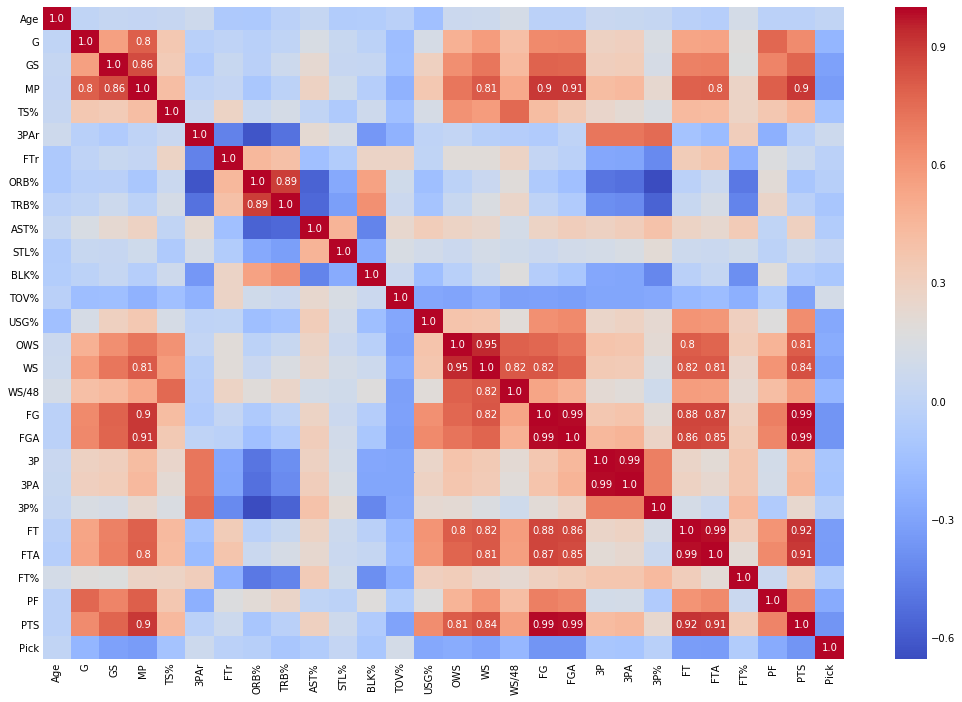

In [33]:
# Check correlations between the rest of features.
correlation = season_stats.drop(['Pos', 'Tm'], axis=1).corr()
# Make a heatmap with highlights on pairs of features with high correlations.
corr_annot = correlation.round(2)
corr_annot[corr_annot.abs()<0.8] = ''
_ = plt.figure(figsize=(16, 12))
_ = sns.heatmap(correlation, annot=corr_annot, cmap='coolwarm', fmt='')

The heatmap revealed several other problems with the dataset.
1. Cumulative data were correlated with each other.<br>
The more games/minutes a player played, the more stats he accumulated. These stats all correlate with each other. The solution is to transform these features to rates.
2. Offensive and total were correlated with each other.<br>
ORB% and TRB%, OWS and WS are highly correlated to each other. That's understandable, a good overall player is usually good on offense and defense. Because of their high correlation, seperating offense and defense provide little additional value. I will delete the offensive features.
3. Points(PTS) and various shot attemps and shot mades(FGA,FG,FT,FTA) were highly correlated.<br>
This is pretty simple, more (made) shots lead to more points. I will drop the points feature.
4. Shot made and shot attemps were highly correlated.<br>
Despite differences in shot accuracy, FG and FGA, 3P and 3PA, FT and FTA were highly correlated. I will keep the shot attempts.

In [34]:
# Drop ORB%, OWS, PTS, FG, 3P, FT
season_stats.drop(['ORB%', 'OWS', 'PTS', 'FG', '3P', 'FT'], axis=1, inplace=True)
# Convert GS into GS%
season_stats['GS%'] = season_stats['GS'].div(season_stats['G'])
season_stats.drop('GS', axis=1, inplace=True)
# Convert FGA, 3PA, FTA, PF into FGA and PF per 48 minutes
season_stats['FGA/48'] = 48 * season_stats['FGA'].div(season_stats['MP'])
season_stats['3PA/48'] = 48 * season_stats['3PA'].div(season_stats['MP'])
season_stats['FTA/48'] = 48 * season_stats['FTA'].div(season_stats['MP'])
season_stats['PF/48'] = 48 * season_stats['PF'].div(season_stats['MP'])
season_stats.drop(['FGA', '3PA', 'FTA', 'PF'], axis=1, inplace=True)
# Convert MP into MP/G
season_stats['MPG'] = season_stats['MP'].div(season_stats['G'])
season_stats.drop('MP', axis=1, inplace=True)

In [35]:
# Save cleaned data
season_stats.to_csv('../data/clean_data.csv')
season_stats.shape

(13378, 24)